# 서울시 공유자전거 '따릉이' 수요 예측 프로젝트
## 단계2. 탐색적 데이터 분석

## 0.프로젝트 소개

### (1) 수행 목표 
서울시 공유자전거인 '따릉이'의 수요와 날씨간 연관성을 분석

#### <font color="blue"> 데이터 분석의 주 목적은 가치있는 정보를 찾아내는것!! </font>

#### 우리가 풀어야 하는 문제는 무엇인가요?

 - 기상상황이 따릉이 수요에 주는 영향을 분석해봅시다.

    * 1.데이터를 탐색하며 정보 획득
        * 날씨 데이터와 서울시 공유 자전거 따릉이의 수요 데이터를 제공해드렸습니다. 
        * 우리는 따릉이의 수요와 날씨간 어떤 연관성이 있는지 탐색 해 봅시다.
    * 2.EDA
        * 주어진 데이터의 변수들을 분석해 봅시다. 


### (2) 데이터 소개

#### 1) 기본 데이터

        * 학습데이터 : sbikedata.csv

#### 2) 데이터셋의 변수 소개

        * date : 날짜
        * hour : 시간
        * temperature : 온도
        * precipitation : 강우 여부, 비가 오지 않았으면 0, 비가 오면 1
        * windspeed : 풍속(평균)
        * humidity : 습도
        * visibility : 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
        * ozone : 오존 수치
        * PM10 : 미세먼지 수치(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
        * PM2.5 : 초미세먼지 수치(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
        * count : 시간에 따른 따릉이 대여 수


## 1.환경설정

* 세부 요구사항
    - 경로 설정 
        * 로컬 수행(Ananconda)
            * 제공된 압축파일을 다운받아 압축을 풀고
            * anaconda의 root directory(보통 C:/Users/< ID > 에 project 폴더를 만들고, 복사해 넣습니다.
        
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다. 
        * 필요하다고 판단되는 라이브러리를 추가하세요.

### (1) 경로 설정 및 라이브러리 로딩
* 이번 프로젝트는 로컬환경에서 진행합니다.

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [ ]:
# path = 'C:/Users/User/'

#### 2) 라이브러리 로딩

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm
import joblib

# 더 필요한 라이브러리를 아래에 추가합니다.
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')  


### (2) 데이터 불러오기
* 주어진 데이터셋
    * 따릉이 수요 및 날씨 데이터 : sbikedata.csv

#### 1) 데이터로딩

In [2]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

df = pd.read_csv('sbikedata.csv')

#### 2) 기본 정보 조회

In [3]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
#전체 데이터의 행,열 개수 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5827 entries, 0 to 5826
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           5827 non-null   object 
 1   hour           5827 non-null   int64  
 2   PM10           5725 non-null   float64
 3   PM2.5          5732 non-null   float64
 4   ozone          5699 non-null   float64
 5   temperature    5827 non-null   float64
 6   precipitation  5827 non-null   int64  
 7   windspeed      5827 non-null   float64
 8   humidity       5827 non-null   int64  
 9   visibility     5827 non-null   int64  
 10  count          5827 non-null   int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 500.9+ KB


In [5]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
#전체 데이터의 모든 변수 확인
df.columns

Index(['date', 'hour', 'PM10', 'PM2.5', 'ozone', 'temperature',
       'precipitation', 'windspeed', 'humidity', 'visibility', 'count'],
      dtype='object')

## 2.EDA 2단계 - 가설 설정

*  '가설' 이란 단어를 생각해보면, 우리가 직접 가설을 만들어야 할것 같지만 통계에서 분석기법별 귀무가설/대립가설은 정해져있습니다.
- 귀무가설은 차이가 없다, 연관성이 없다, 효과가 없다.
- 대립가설은 차이가 있다, 연관성이 있다, 효과가 있다. 라고 간단하게 이해하시면 좋습니다.

    * 간단한 예로, 온도와 따릉이 대여량간 가설을 수립 해본다면

        - 귀무가설 : 온도와 따릉이 간에는 연관성이 없다.
        - 대립가설 : 온도와 따릉이 간에는 연관성이 있다.

        로 가설이 자연스레 수립 됩니다.


### (1) 가설 수립
* 'precipitation' 변수를 포함하여, 최소 5개 이상의 Feature와 따릉이 대여량 간 가설을 수립해주세요.
    * Guide : Target은 따릉이 대여량 입니다.


* 귀무가설 1: 온도와 따릉이 대여량간에는 관계가 없다.
* 대립가설 1: 온도와 따릉이 대여량간에는 관계가 있다.


* 귀무가설 2: 시간과 따릉이 대여량간에는 관계가 없다.
* 대립가설 2: 시간과 따릉이 대여량간에는 관계가 있다.


* 귀무가설 3: 미세먼지 농도와 따릉이 대여량간에는 관계가 없다.
* 대립가설 3: 미세먼지 농도와 따릉이 대여량간에는 관계가 있다.


* 귀무가설 4: 초 미세먼지 농도와 따릉이 대여량간에는 관계가 없다.
* 대립가설 4: 초 미세먼지 농도와 따릉이 대여량간에는 관계가 있다.


* 귀무가설 5: 오존과 따릉이 대여량간에는 관계가 없다
* 대립가설 5: 오존과 따릉이 대여량간에는 관계가 있다

* 귀무가설 6: 강수여부와 따릉이 대여량간에는 관계가 없다
* 대립가설 6: 강수여부와 따릉이 대여량간에는 관계가 있다

* 귀무가설 7: 풍속과 따릉이 대여량간에는 관계가 없다
* 대립가설 7: 풍속과 따릉이 대여량간에는 관계가 있다

* 귀무가설 8: 습도와 따릉이 대여량간에는 관계가 없다
* 대립가설 8: 습도와 따릉이 대여량간에는 관계가 있다

* 귀무가설 9: 가시성과 따릉이 대여량간에는 관계가 없다
* 대립가설 9: 가시성과 따릉이 대여량간에는 관계가 있다


## 3.EDA 3단계 - 이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

### (1) 범주형 Feature --> 숫자형 Y (따릉이 대여 Count)
* 모든 범주형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    1. 시각화 : 그래프를 활용한 데이터 분석
    2. 수치화 : t-test, anova
    3. 관계 평가

#### 1) 강수 여부와 따릉이 대여량간 이변량 분석

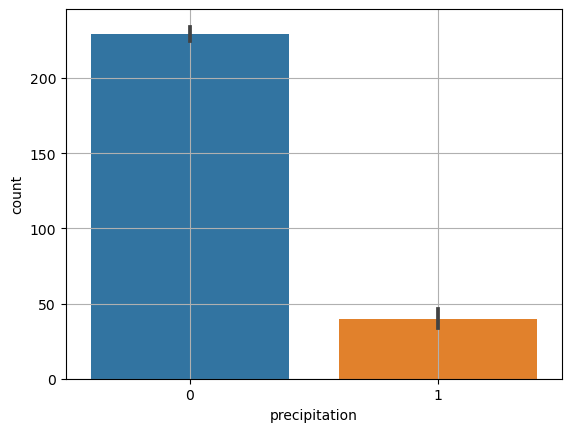

In [6]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
sns.barplot(x="precipitation", y="count", data=df)
plt.grid()
plt.show()

1시간 전 비가 오지 않았을떄 (0 일때) 따릉이 대여 건수 평균이 100이상임

1시간 전 비가 왔을때 (1 일때) 따릉이 대여 건수는 매우 낮은 편임

In [8]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
df['precipitation'].isna().sum()

0

In [9]:
not_rain = df.loc[df['precipitation']==0, 'count']
rain = df.loc[df['precipitation']==1, 'count']

In [10]:
spst.ttest_ind(not_rain, rain)

TtestResult(statistic=21.389614151911022, pvalue=8.86239184041254e-98, df=5825.0)

In [11]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# P_value 값이 작기 때문에 강수여부와 대여량은 상관이 있다는 것을 파악했다.

* 귀무가설은 X가 Y와 관련이 없다. 
* 대립가설은 X와 Y가 관련이 있다.

* P-value (유의확률)가 0.05 이하라면? 해당 변수는 매우 유의미한 값으로 판단 가능함

### (2) 숫자형 Feature --> 숫자형 Y (따릉이 대여 Count)
* 모든 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    1. 시각화 : 그래프를 활용한 데이터 분석
    2. 수치화 : 상관분석
    3. 관계 평가

#### 1) 시간대별 대여량 분석

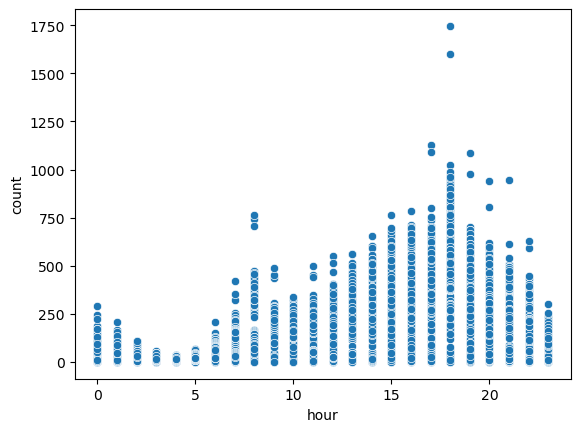

In [17]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
sns.scatterplot(x='hour', y='count', data = df)
plt.show()

In [90]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
spst.pearsonr(df['hour'], df['count'])

PearsonRResult(statistic=0.587558535914158, pvalue=0.0)

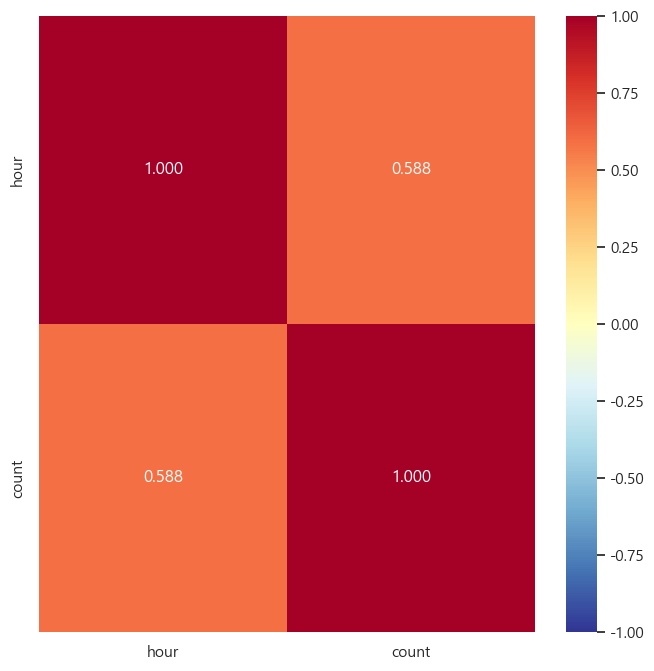

In [91]:
# 상관계수를 heatmap으로 시각화
plt.figure(figsize = (8, 8))
sns.heatmap(df[['hour','count']].corr(), 
            annot = True,            # 숫자(상관계수) 표기 여부
            fmt = '.3f',             # 숫자 포멧 : 소수점 3자리까지 표기
            cmap = 'RdYlBu_r',       # 칼라맵
            vmin = -1, vmax = 1)     # 값의 최소, 최대값
plt.show()

In [26]:
# 전체 시간으로 보았을 떈 강한 상관관계를 보이는 것은 아니다. 

In [ ]:
# 출근 시간 / #활동시간 / #퇴근 시간 / #바활동시간

Pearson 상관 계수 (출근 시간): -0.3149204704037492
Pearson 상관 계수 (활동 시간): 0.43918627117413056
Pearson 상관 계수 (퇴근 시간): -0.43274773855533416
Pearson 상관 계수 (비활동 시간): 0.6824307082468335


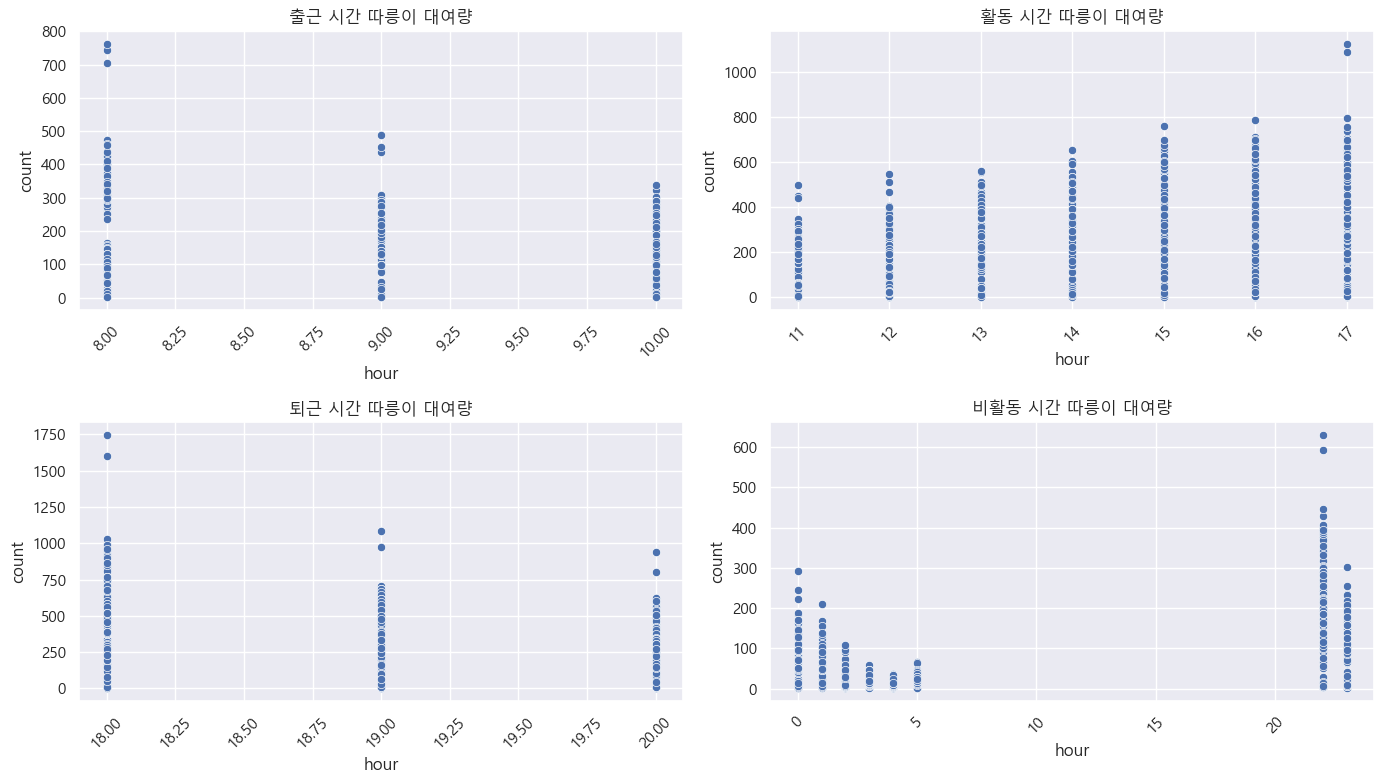

In [42]:
plt.figure(figsize=(14, 8))

# 출근 시간
plt.subplot(2, 2, 1)
temp_hour_m = df.loc[(df['hour'] >= 8) & (df['hour'] < 11)]
sns.scatterplot(x='hour', y='count', data=temp_hour_m)
plt.title('출근 시간 따릉이 대여량')
plt.xticks(rotation=45)
correlation_m, _ = spst.pearsonr(temp_hour_m['hour'], temp_hour_m['count'])
print(f'Pearson 상관 계수 (출근 시간): {correlation_m}')

# 활동 시간
plt.subplot(2, 2, 2)
temp_hour_l = df.loc[(df['hour'] >= 11) & (df['hour'] < 18)]
sns.scatterplot(x='hour', y='count', data=temp_hour_l)
plt.title('활동 시간 따릉이 대여량')
plt.xticks(rotation=45)
correlation_l, _ = spst.pearsonr(temp_hour_l['hour'], temp_hour_l['count'])
print(f'Pearson 상관 계수 (활동 시간): {correlation_l}')

# 퇴근 시간
plt.subplot(2, 2, 3)
temp_hour_e = df.loc[(df['hour'] >= 18) & (df['hour'] < 21)]
sns.scatterplot(x='hour', y='count', data=temp_hour_e)
plt.title('퇴근 시간 따릉이 대여량')
plt.xticks(rotation=45)
correlation_e, _ = spst.pearsonr(temp_hour_e['hour'], temp_hour_e['count'])
print(f'Pearson 상관 계수 (퇴근 시간): {correlation_e}')

# 비활동 시간
plt.subplot(2, 2, 4)
temp_hour_n = pd.concat([df.loc[df['hour'] >= 22], df.loc[df['hour'] <= 5]])
sns.scatterplot(x='hour', y='count', data=temp_hour_n)
plt.title('비활동 시간 따릉이 대여량')
plt.xticks(rotation=45)
correlation_n, _ = spst.pearsonr(temp_hour_n['hour'], temp_hour_n['count'])
print(f'Pearson 상관 계수 (비활동 시간): {correlation_n}')

plt.tight_layout()
plt.show()

In [44]:
# 히트맵 분석

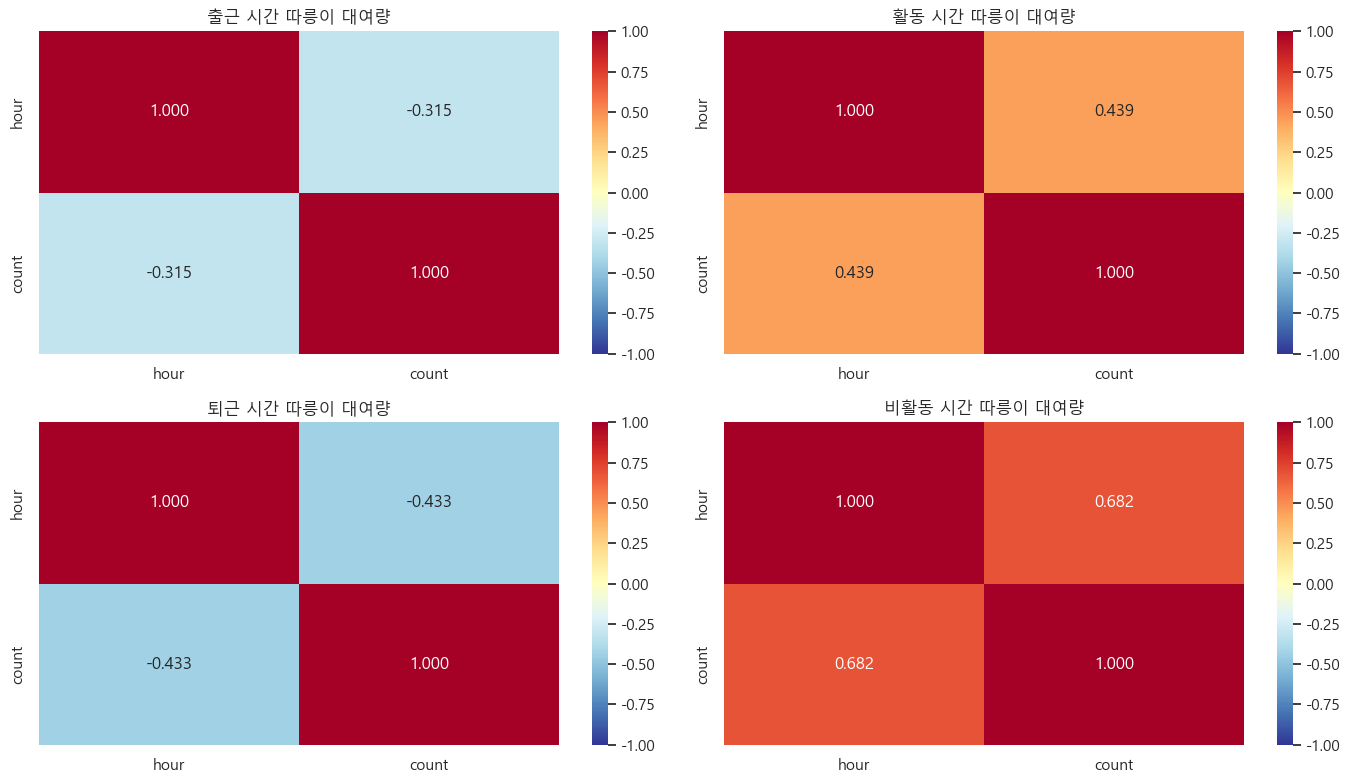

In [46]:
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.title('출근 시간 따릉이 대여량')
sns.heatmap(temp_hour_m[['hour','count']].corr(), 
            annot = True,            # 숫자(상관계수) 표기 여부
            fmt = '.3f',             # 숫자 포멧 : 소수점 3자리까지 표기
            cmap = 'RdYlBu_r',       # 칼라맵
            vmin = -1, vmax = 1)     # 값의 최소, 최대값

plt.subplot(2, 2, 2)
plt.title('활동 시간 따릉이 대여량')
sns.heatmap(temp_hour_l[['hour','count']].corr(), 
            annot = True,            # 숫자(상관계수) 표기 여부
            fmt = '.3f',             # 숫자 포멧 : 소수점 3자리까지 표기
            cmap = 'RdYlBu_r',       # 칼라맵
            vmin = -1, vmax = 1)     # 값의 최소, 최대값
plt.subplot(2, 2, 3)
plt.title('퇴근 시간 따릉이 대여량')
sns.heatmap(temp_hour_e[['hour','count']].corr(), 
            annot = True,            # 숫자(상관계수) 표기 여부
            fmt = '.3f',             # 숫자 포멧 : 소수점 3자리까지 표기
            cmap = 'RdYlBu_r',       # 칼라맵
            vmin = -1, vmax = 1)     # 값의 최소, 최대값

plt.subplot(2, 2, 4)
plt.title('비활동 시간 따릉이 대여량')
sns.heatmap(temp_hour_n[['hour','count']].corr(), 
            annot = True,            # 숫자(상관계수) 표기 여부
            fmt = '.3f',             # 숫자 포멧 : 소수점 3자리까지 표기
            cmap = 'RdYlBu_r',       # 칼라맵
            vmin = -1, vmax = 1)     # 값의 최소, 최대값

plt.tight_layout()
plt.show()

#### 2) 온도 데이터 분석

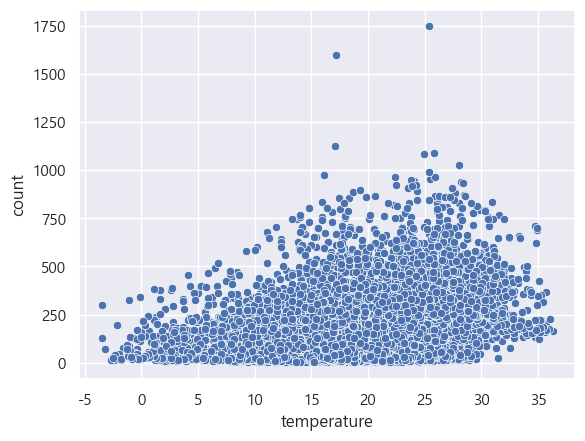

In [47]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
sns.scatterplot(x='temperature', y='count', data = df)
plt.show()

In [51]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
spst.pearsonr(df['temperature'], df['count'])

PearsonRResult(statistic=0.2771692363089791, pvalue=2.940516555113978e-103)

In [52]:
# Pvlaue가 0.05 이하이기 때문에 유의미한 값이라고 생각한다.

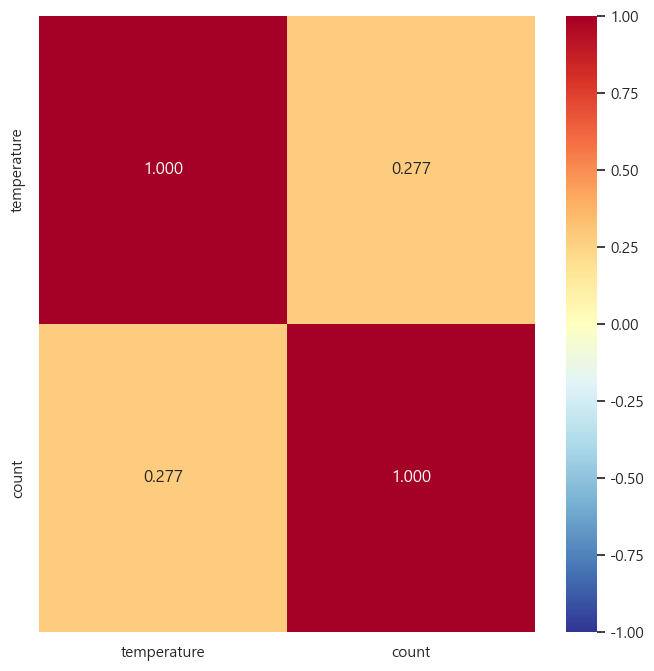

In [55]:
# 상관계수를 heatmap으로 시각화
plt.figure(figsize = (8, 8))
sns.heatmap(df[['temperature','count']].corr(), 
            annot = True,            # 숫자(상관계수) 표기 여부
            fmt = '.3f',             # 숫자 포멧 : 소수점 3자리까지 표기
            cmap = 'RdYlBu_r',       # 칼라맵
            vmin = -1, vmax = 1)     # 값의 최소, 최대값
plt.show()

#### 3) 풍속에 대한 분석

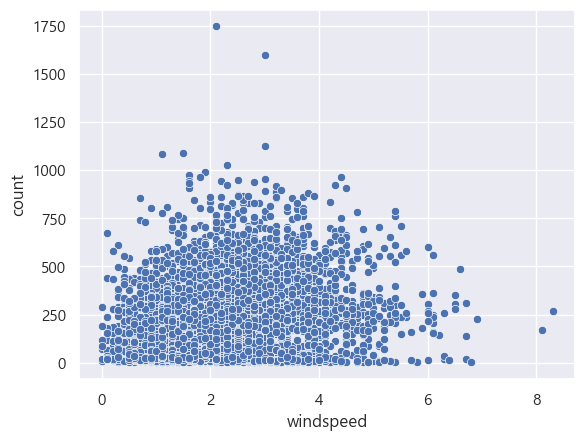

In [56]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
sns.scatterplot(x='windspeed', y='count', data = df)
plt.show()

In [58]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
spst.pearsonr(df['windspeed'], df['count'])

PearsonRResult(statistic=0.22372189900674888, pvalue=5.243317678213925e-67)

In [ ]:
# P_value가 0.05보다 작기 때문에 유의미한 수치라는 것을 확인할 수 있다.

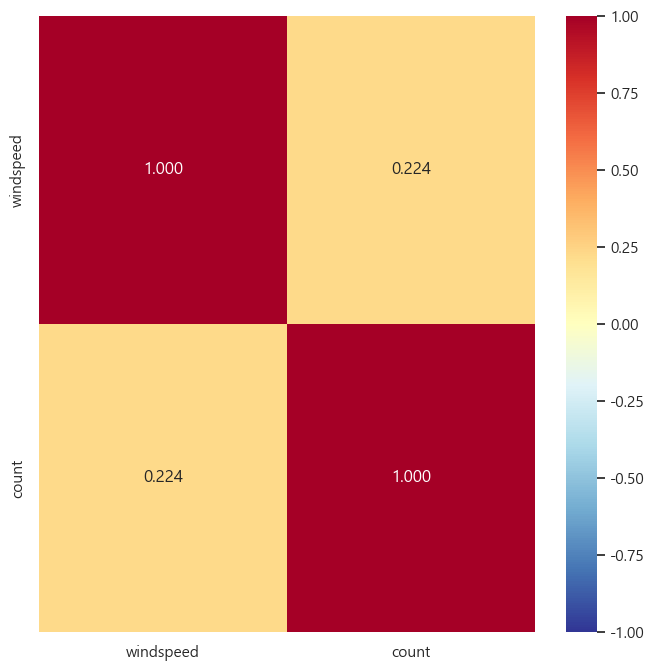

In [59]:
# 상관계수를 heatmap으로 시각화
plt.figure(figsize = (8, 8))
sns.heatmap(df[['windspeed','count']].corr(), 
            annot = True,            # 숫자(상관계수) 표기 여부
            fmt = '.3f',             # 숫자 포멧 : 소수점 3자리까지 표기
            cmap = 'RdYlBu_r',       # 칼라맵
            vmin = -1, vmax = 1)     # 값의 최소, 최대값
plt.show()

#### 4) 습도에 대한 예측

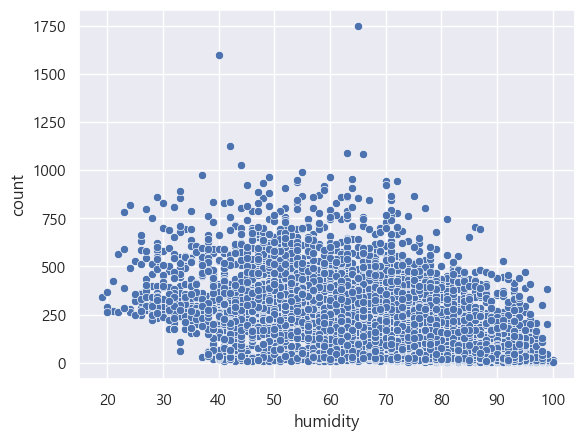

In [60]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
sns.scatterplot(x='humidity', y='count', data = df)
plt.show()

In [63]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
spst.pearsonr(df['humidity'], df['count'])

PearsonRResult(statistic=-0.4789554265904137, pvalue=0.0)

In [65]:
# P_Value가 0.05보다 작기 때문에 유의미한 수치라고 판단한다. 하지만 따릉이가 한강 등 여러 산책로에서 많이 활성화 된 경우가 있기 때문에 그 부분을 고려해야한다고 생각한다.

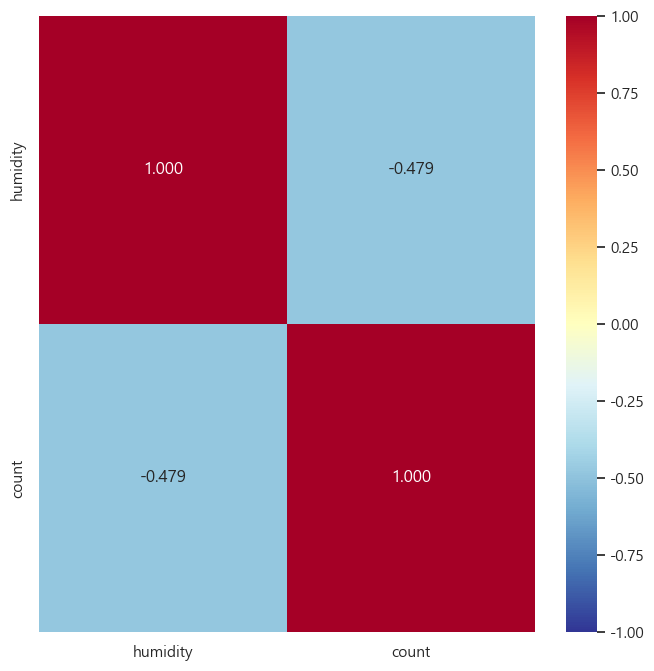

In [66]:
# 상관계수를 heatmap으로 시각화
plt.figure(figsize = (8, 8))
sns.heatmap(df[['humidity','count']].corr(), 
            annot = True,            # 숫자(상관계수) 표기 여부
            fmt = '.3f',             # 숫자 포멧 : 소수점 3자리까지 표기
            cmap = 'RdYlBu_r',       # 칼라맵
            vmin = -1, vmax = 1)     # 값의 최소, 최대값
plt.show()

#### 5) 시정에 대한 분석

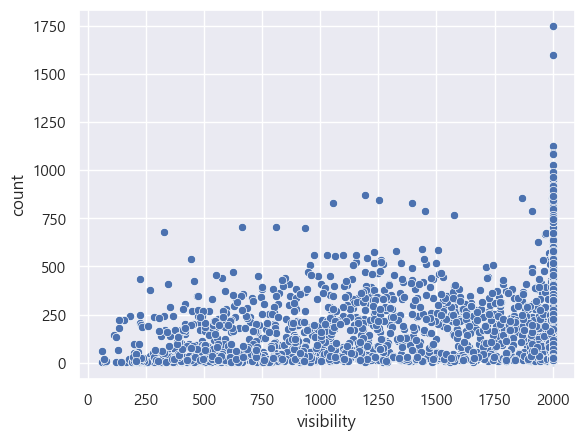

In [67]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
sns.scatterplot(x='visibility', y='count', data = df)
plt.show()

In [70]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
spst.pearsonr(df['visibility'], df['count'])

PearsonRResult(statistic=0.26582778327488765, pvalue=7.87600385276935e-95)

In [ ]:
# P_Value가 0.05보다 작기 때문에 유의미한 수치라고 판단한다.

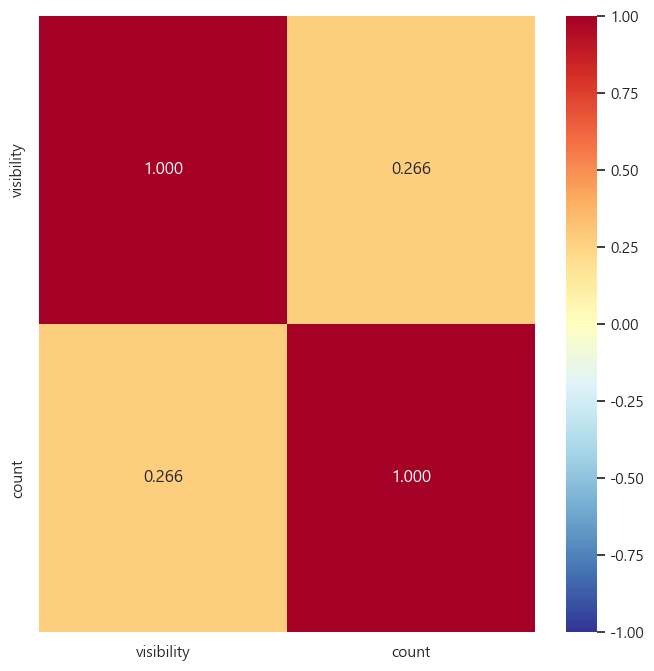

In [71]:
# 상관계수를 heatmap으로 시각화
plt.figure(figsize = (8, 8))
sns.heatmap(df[['visibility','count']].corr(), 
            annot = True,            # 숫자(상관계수) 표기 여부
            fmt = '.3f',             # 숫자 포멧 : 소수점 3자리까지 표기
            cmap = 'RdYlBu_r',       # 칼라맵
            vmin = -1, vmax = 1)     # 값의 최소, 최대값
plt.show()

#### 6) 오존 데이터 분석

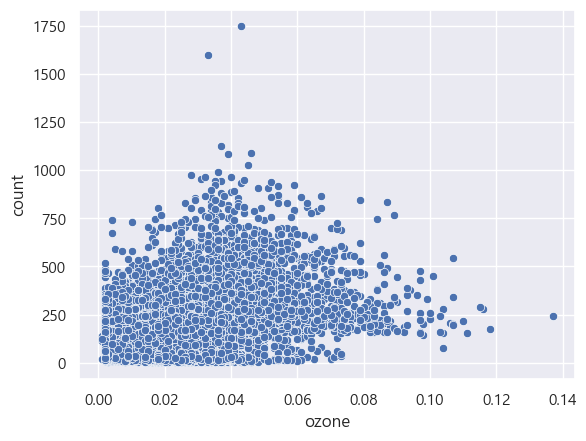

In [72]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
sns.scatterplot(x='ozone', y='count', data = df)
plt.show()

In [76]:
df = df.loc[df['ozone'].notnull()]
# 아래에 실습코드를 작성하고 결과를 확인합니다.
spst.pearsonr(df['ozone'], df['count'])

PearsonRResult(statistic=0.3160825461602971, pvalue=2.039910841831957e-132)

In [77]:
# P_Value가 0.05보다 작기 때문에 유의미한 수치라고 판단한다.

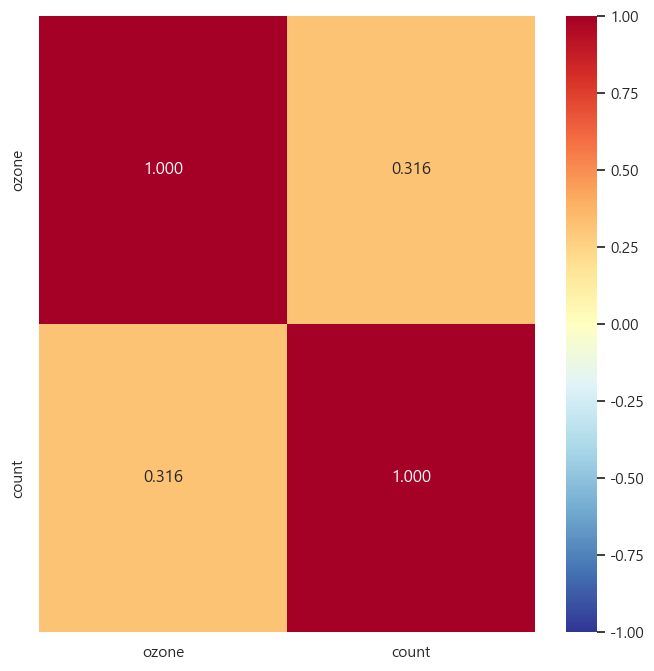

In [78]:
# 상관계수를 heatmap으로 시각화
plt.figure(figsize = (8, 8))
sns.heatmap(df[['ozone','count']].corr(), 
            annot = True,            # 숫자(상관계수) 표기 여부
            fmt = '.3f',             # 숫자 포멧 : 소수점 3자리까지 표기
            cmap = 'RdYlBu_r',       # 칼라맵
            vmin = -1, vmax = 1)     # 값의 최소, 최대값
plt.show()

#### 7) 미세먼지 농도 데이터 분석

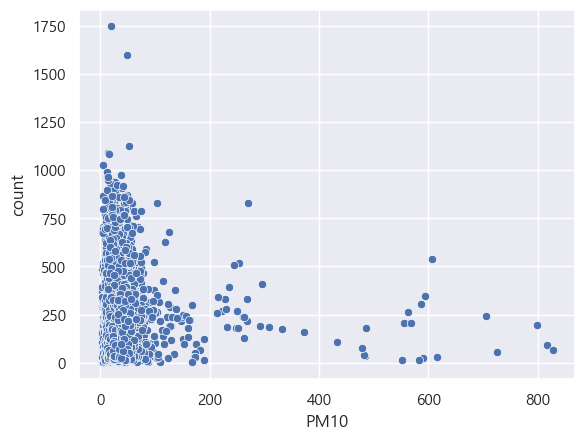

In [79]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
sns.scatterplot(x='PM10', y='count', data = df)
plt.show()

In [82]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
df = df.loc[df['PM10'].notnull()]
spst.pearsonr(df['PM10'], df['count'])

PearsonRResult(statistic=0.032624808679523894, pvalue=0.013961298973303093)

In [83]:
# P_Value가 0.05보다 작기 때문에 유의미한 수치라고 판단한다.

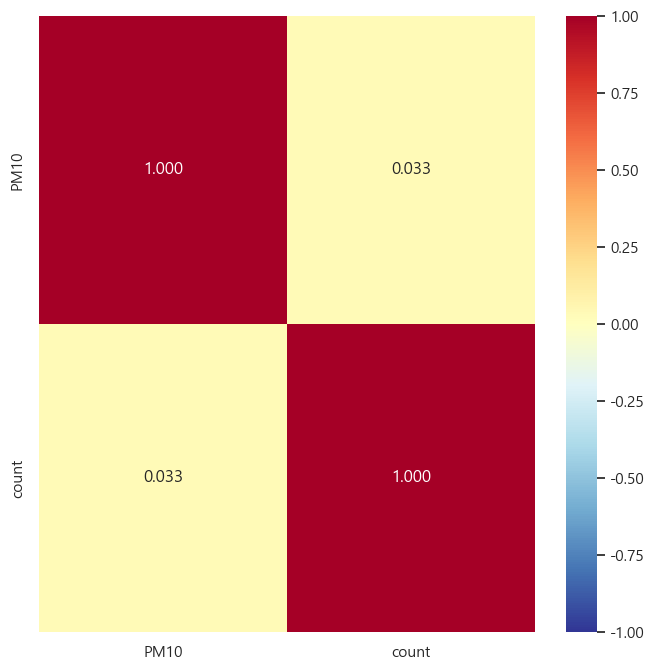

In [84]:
# 상관계수를 heatmap으로 시각화
plt.figure(figsize = (8, 8))
sns.heatmap(df[['PM10','count']].corr(), 
            annot = True,            # 숫자(상관계수) 표기 여부
            fmt = '.3f',             # 숫자 포멧 : 소수점 3자리까지 표기
            cmap = 'RdYlBu_r',       # 칼라맵
            vmin = -1, vmax = 1)     # 값의 최소, 최대값
plt.show()

#### 8) 초미세먼지 농도에 대한 분석

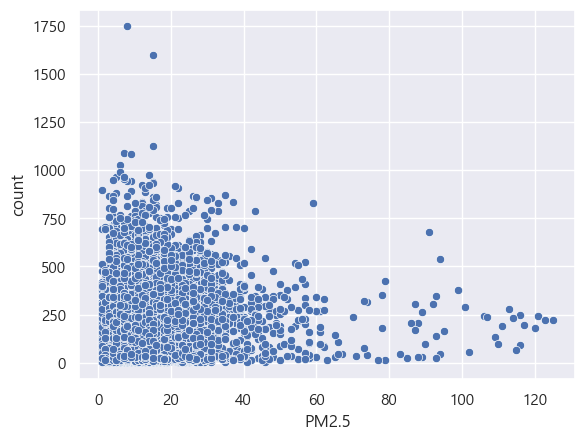

In [85]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
sns.scatterplot(x='PM2.5', y='count', data = df)
plt.show()

In [87]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
df = df.loc[df['PM2.5'].notnull()]
spst.pearsonr(df['PM2.5'], df['count'])

PearsonRResult(statistic=0.0529237283818275, pvalue=6.690256718091033e-05)

In [88]:
# P_Value가 0.05보다 작기 때문에 유의미한 수치라고 판단한다.

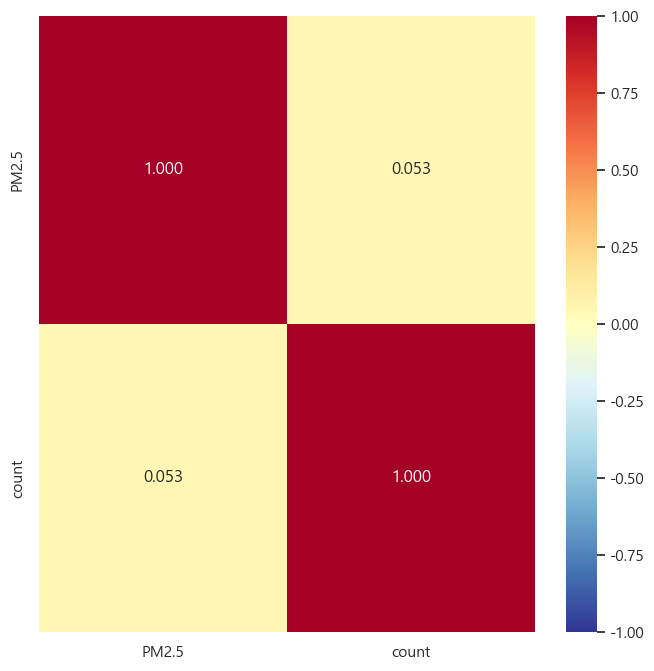

In [89]:
# 상관계수를 heatmap으로 시각화
plt.figure(figsize = (8, 8))
sns.heatmap(df[['PM2.5','count']].corr(), 
            annot = True,            # 숫자(상관계수) 표기 여부
            fmt = '.3f',             # 숫자 포멧 : 소수점 3자리까지 표기
            cmap = 'RdYlBu_r',       # 칼라맵
            vmin = -1, vmax = 1)     # 값의 최소, 최대값
plt.show()

## 4. 가설 검정

### 1. 강한 관계의 변수 (대립가설 채택) 



In [93]:
# 강수 여부, 시간, 습도

In [111]:
# 강수 여부와 습도는 관계가 있는지 ?
# 귀무가설: 한강의 영향으로 비가 오지 않는 날에도 습도가 높을 것이다.
# 대립가설: 비가 오지 않는 날엔 습도가 낮을 것이다.

비가 오지 않는 날:
count    5243.000000
mean       66.725348
std        16.489892
min        19.000000
25%        55.000000
50%        68.000000
75%        79.000000
max        99.000000
Name: humidity, dtype: float64

비가 오는 날:
count    427.000000
mean      91.824356
std        6.871016
min       58.000000
25%       89.000000
50%       94.000000
75%       97.000000
max      100.000000
Name: humidity, dtype: float64


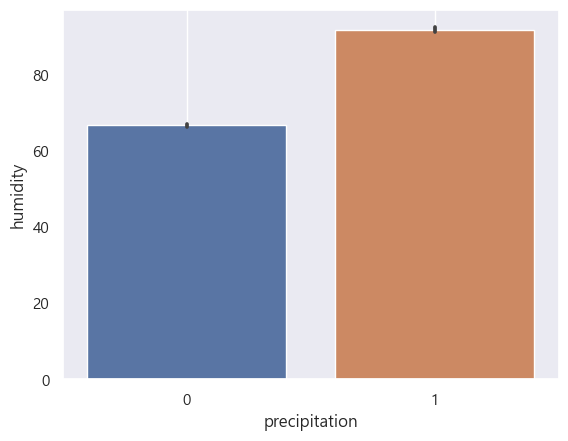

In [106]:
notrainy_days = df[df['precipitation'] == 0]
rainy_days = df[df['precipitation'] == 1]
# 습도가 높은 비오는 날의 통계 정보 출력
print("비가 오지 않는 날:")
print(notrainy_days['humidity'].describe())
print()
print("비가 오는 날:")
print(rainy_days['humidity'].describe())

sns.barplot(x="precipitation", y="humidity", data=df)
plt.grid()
plt.show()

In [110]:
# 숫자로 변환된 humidity 열 사용
rainy_humidity = rainy_days['humidity'].astype(float)
notrainy_humidity = notrainy_days['humidity'].astype(float)

spst.ttest_ind(rainy_humidity, notrainy_humidity)

TtestResult(statistic=31.230218011478392, pvalue=1.0489746572091823e-197, df=5668.0)

In [ ]:
# Pvalue가 0.05보다 작기 때문에 유의미한 값이라고 생각한다.

In [96]:
# 따릉이의 사용량의 시간대별 차이를 보이는 이유?(인사이트)

### 2. 약한 관계의 변수


In [97]:
# 미세먼지 농도, 초 미세먼지 농도, 오존, 온도, 풍속, 시정

### 3. 관계 없는 변수 (귀무가설 채택)


## 5. Insight 도출